In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
file_path = "C:/Users/meetu/Downloads/spam.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df['target'] = df['v1']
df['text'] = df['v2']
df = df.drop(['v1', 'v2'], axis = 1)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target']).astype('int')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int32 
 1   text    5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [6]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [7]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

<Axes: xlabel='target'>

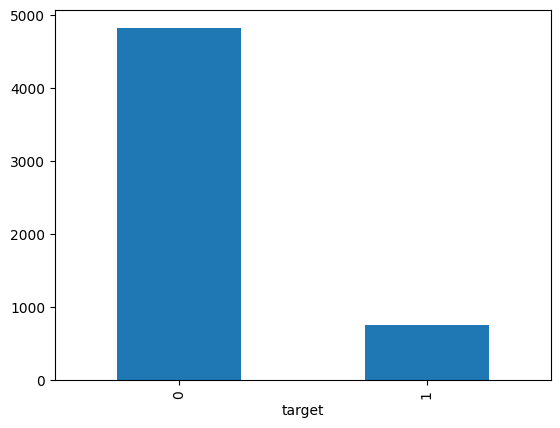

In [8]:
df['target'].value_counts().plot(kind = 'bar')

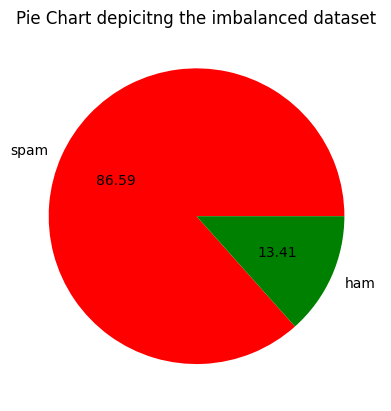

In [9]:
plt.pie(df['target'].value_counts(), labels = ['spam', 'ham'], colors = ['red', 'green'], autopct = '%0.2f')
plt.title("Pie Chart depicitng the imbalanced dataset")
plt.show()

# Text preproceesing 

In [10]:
chatwords_dict = {
    "LOL": "Laugh Out Loud",
    "BRB": "Be Right Back",
    "OMG": "Oh My God",
    "FYI": "For Your Information",
    "IDK": "I Don't Know",
    "BTW": "By The Way",
    "IMO": "In My Opinion",
    "IMHO": "In My Humble Opinion",
    "TBH": "To Be Honest",
    "ROFL": "Rolling On the Floor Laughing",
    "LMAO": "Laughing My A** Off",
    "IKR": "I Know, Right?",
    "TTYL": "Talk To You Later",
    "NP": "No Problem",
    "THX": "Thanks",
    "TY": "Thank You",
    "BFF": "Best Friends Forever",
    "DM": "Direct Message",
    "RT": "Retweet",
    "SMH": "Shaking My Head",
    "GTG": "Got To Go",
    "AFAIK": "As Far As I Know",
    "FWIW": "For What It's Worth",
    "TL;DR": "Too Long; Didn't Read",
    "IRL": "In Real Life",
    "TMI": "Too Much Information",
    "HBD": "Happy Birthday",
    "TBT": "Throwback Thursday",
    "YOLO": "You Only Live Once",
    "AMA": "Ask Me Anything",
    "ASAP": "As soon as possible",
    "GN": "Good night"
}

In [11]:
def text_preprocessing(statement):
    
    # Lowercasing the words
    lst = []
    for word in statement.split():
        lst.append(word.lower())
    statement = " ".join(lst)
    
    # Alpha numerical
    lst0 = []
    for i in statement.split():
        if i.isalnum():
            lst0.append(i)
    statement = ' '.join(lst0)
            
    
    # punctuations removal
    import string
    lst1 = string.punctuation
    statement = statement.translate(str.maketrans('', '', lst1))
    
    # Removal of URLs
    import re
    pattern = re.compile('https?://\S+|www\.\S+')
    statement = pattern.sub('', statement)
    
    # HTML tags removal
    pattern1 = re.compile('<.*?>')
    statement = pattern1.sub('', statement)
    
    # Stopword removal
    lst2 = []
    from nltk.corpus import stopwords
    for i in statement.split():
        if i in stopwords.words('english'):
            statement.replace(i, '')
        else:
            lst2.append(i)
    statement = " ".join(lst2)
    
    # Chatwords removal
    lst4 = []
    for i in statement.split():
        if i in chatwords_dict:
            lst4.append(statement.replace(i, chatwords_dict[i]))
        else:
            lst4.append(i)
    statement = " ".join(lst4)
    
    # Stemming
    #mport nltk
    #st2 = []
    #rom nltk.stem.porter import PorterStemmer
    #s = PorterStemmer()
    #or word in statement.split():
    #   lst2.append(ps.stem(word))
    #tatement = " ".join(lst2)
        
    # Lemmatization
    lst3 = []
    import nltk
    #ltk.download('wordnet')
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    for word in statement.split():
        lst3.append(lemmatizer.lemmatize(word))
        statement = " ".join(lst3) 
        
    return statement

In [12]:
text_preprocessing(df['text'][5567])

'2nd time tried 2 contact u pound 2 claim call 087187272008 10p per'

In [13]:
df['text'][5567]

'This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [14]:
df['text'] = df['text'].apply(text_preprocessing)

In [15]:
df

,target,text
0,0,go jurong available bugis n great world la e c...
1,0,ok joking wif u
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early u c already
4,0,nah think go life around though
...,...,...
5567,1,2nd time tried 2 contact u pound 2 claim call ...
5568,0,b going esplanade fr
5569,0,mood
5570,0,guy bitching acted like interested buying some...


In [16]:
spam_words = []
for i in df[df['target'] == 1]['text'].tolist():
    for j in i.split():
        spam_words.append(j)

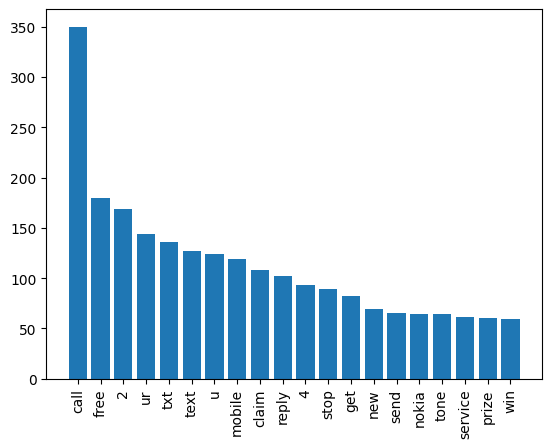

In [17]:
from collections import Counter
lst_spam = Counter(spam_words).most_common(20)
new_df = pd.DataFrame(lst_spam, columns = ['words', 'count'])
plt.bar(new_df['words'], new_df['count'])
plt.xticks(rotation = 'vertical')
plt.show()

In [18]:
ham_words = []
for i in df[df['target'] == 0]['text'].tolist():
    for j in i.split():
        ham_words.append(j)

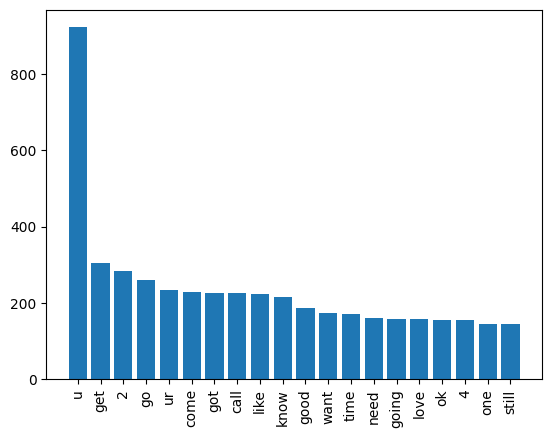

In [19]:
import seaborn as sns
from collections import Counter
lst_ham = Counter(ham_words).most_common(20)
new_df = pd.DataFrame(lst_ham, columns = ['words', 'count'])
plt.bar(new_df['words'], new_df['count'])
plt.xticks(rotation = 'vertical')
plt.show()

In [20]:
from wordcloud import WordCloud
wc = WordCloud(height = 500, width = 500)

In [21]:
spam_wc = wc.generate(df[df['target']==1]['text'].str.cat(sep=' '))

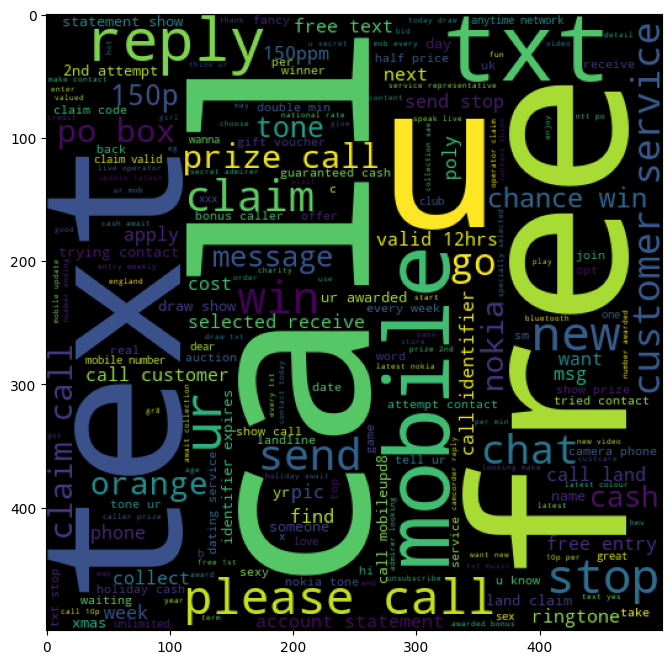

In [22]:
plt.figure(figsize = (12,8))
plt.imshow(spam_wc)

In [23]:
ham_wc = wc.generate(df[df['target']==0]['text'].str.cat(sep=' '))

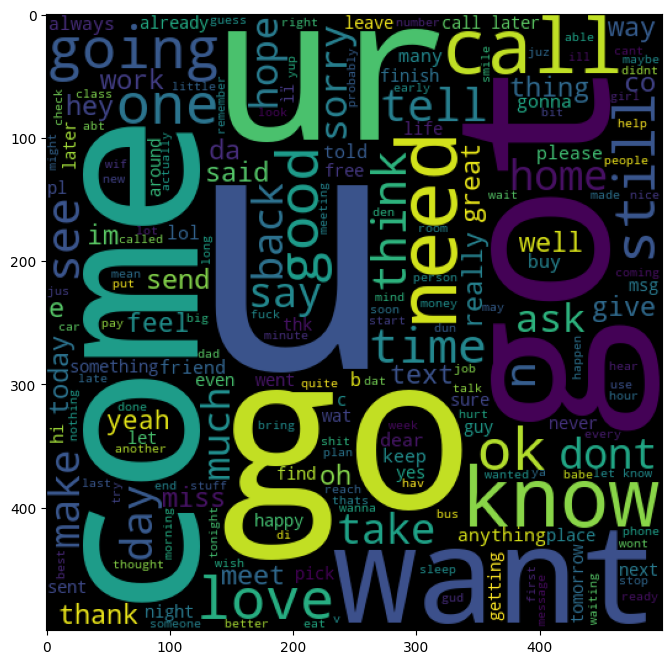

In [24]:
plt.figure(figsize = (12,8))
plt.imshow(ham_wc)

In [25]:
tfdif = TfidfVectorizer()
x = tfdif.fit_transform(df['text']).toarray()

y = df['target'].values

In [26]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

mn = MultinomialNB()
lsts = []

for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i)
    mn.fit(x_train, y_train)
    y_pred = mn.predict(x_test)
    lsts.append(accuracy_score(y_test, y_pred))
 
np.argmax(lsts)

361

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = np.argmax(lsts))
mn.fit(x_train, y_train)
y_pred = mn.predict(x_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.9720028715003589
[[1231    0]
 [  39  123]]
Precision = 1.0


In [30]:
from sklearn.ensemble import ExtraTreesClassifier
xtc = ExtraTreesClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = np.argmax(lsts))
xtc.fit(x_train, y_train)
y_pred = xtc.predict(x_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.9827709978463748
[[1228    3]
 [  21  141]]
Precision = 0.9791666666666666


In [31]:
gn = GaussianNB()
bn = BernoulliNB()

In [32]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = np.argmax(lsts))
gn.fit(x_train, y_train)
y_pred = gn.predict(x_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.8104809763101221
[[978 253]
 [ 11 151]]
Precision = 0.37376237623762376


In [33]:
from sklearn.ensemble import VotingClassifier
estimators = [('mn', MultinomialNB()), ('bn', BernoulliNB())]
vc = VotingClassifier(estimators = estimators, n_jobs = -1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = np.argmax(lsts))
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.9698492462311558
[[1231    0]
 [  42  120]]
Precision = 1.0


In [34]:
estimators = [('mn', MultinomialNB()), ('bn', BernoulliNB())]
vc = VotingClassifier(estimators = estimators, voting = 'soft', n_jobs = -1)


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = np.argmax(lsts))
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.9813352476669059
[[1227    4]
 [  22  140]]
Precision = 0.9722222222222222


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = np.argmax(lsts))
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.9798994974874372
[[1228    3]
 [  25  137]]
Precision = 0.9785714285714285


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = np.argmax(lsts))
bn.fit(x_train, y_train)
y_pred = bn.predict(x_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.9813352476669059
[[1226    5]
 [  21  141]]
Precision = 0.9657534246575342


In [38]:
# Final model
from sklearn.ensemble import VotingClassifier
estimators = [('xtc', ExtraTreesClassifier()), ('rfc', RandomForestClassifier()), ('mn', MultinomialNB())]
vc = VotingClassifier(estimators = estimators, voting = 'soft', n_jobs = -1)


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = np.argmax(lsts))
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.9806173725771715
[[1231    0]
 [  27  135]]
Precision = 1.0


In [40]:
from sklearn.ensemble import VotingClassifier
estimators = [('xtc', ExtraTreesClassifier()), ('rfc', RandomForestClassifier()), ('mn', MultinomialNB())]
vc_xrm = VotingClassifier(estimators = estimators, n_jobs = -1)


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = np.argmax(lsts))
vc_xrm.fit(x_train, y_train)
y_pred = vc_xrm.predict(x_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))

Accuracy = 0.9827709978463748
[[1231    0]
 [  24  138]]
Precision = 1.0


In [41]:
import pickle
pickle.dump(vc_xrm, open('spam_clsfr_model', 'wb'))